# Yearly Trends: Analysis

This notebook uses the CSV files created by scripts based on the build notebook -- see `yearly_tf.py` and `yearly_tfidf.py` in the **python** directory. These scripts produce a matrix in which every word is a row and every year a column such that we can read a word's usage from left to right moving forward in time from 2002 to 2017.

In the first section below, we normalize the term frequencies and then begin some initial explorations of trends based on using standard deviation as a measure of how dispersed the values are.

In the section section below we load the TF-IDF values and then compute a standard deviation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For higher res, and nicer-looking, plots:
plt.rcParams['figure.figsize'] = [12, 8]
sns.set()

In [3]:
# Load the Data
df = pd.read_csv('../output/yearly-tf-min2_max1.0.csv', index_col = 'term')

# The 'Unnamed: 0' column is a vestigial index, let's drop it:
df.drop(columns = ['Unnamed: 0'], inplace=True)
# df.set_index('term', inplace=True)

# Check shape and list columns:
print(df.shape, list(df))

(21722, 16) ['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21722 entries, 00 to zurich
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2002    21722 non-null  float64
 1   2003    21722 non-null  float64
 2   2004    21722 non-null  float64
 3   2005    21722 non-null  float64
 4   2006    21722 non-null  float64
 5   2007    21722 non-null  float64
 6   2008    21722 non-null  float64
 7   2009    21722 non-null  float64
 8   2010    21722 non-null  float64
 9   2011    21722 non-null  float64
 10  2012    21722 non-null  float64
 11  2013    21722 non-null  float64
 12  2014    21722 non-null  float64
 13  2015    21722 non-null  float64
 14  2016    21722 non-null  float64
 15  2017    21722 non-null  float64
dtypes: float64(16)
memory usage: 3.4+ MB


## Normalized Term Frequency

In the next series of cells, we first get the total number of words for each year, and then we get a list of our year columns so that we can then get a sum for each column and divide each term for a given year by the total number of words for that year. 

In [4]:
# a quick check of the sums involved
df.sum(axis = 0, skipna = True)

2002     73153
2003     85039
2004     79782
2005     99193
2006    105353
2007    133227
2008    114236
2009    126229
2010    122575
2011    119465
2012     99317
2013    126976
2014    145956
2015    136625
2016    128932
2017    162345
dtype: int64

This is a note: if you have a column that you wish to ignore when making column-wise calculations, first create a list of the column you do want, and then specify those columns in the calculation. The first few times I worked with this dataframe, I had a difficult time setting the index to `terms` and so this was the workaround I developed:
```python
years = list(df)[1:]
df[years] = df[years] / df[years].sum()
```

In [5]:
# divide each cell in a column by the total for each column
df = df / df.sum()

In [6]:
df.loc['nuclear']

2002    0.000137
2003    0.000012
2004    0.000000
2005    0.000040
2006    0.000028
2007    0.000083
2008    0.000639
2009    0.000071
2010    0.000636
2011    0.000059
2012    0.000141
2013    0.000173
2014    0.000082
2015    0.000059
2016    0.000031
2017    0.000012
Name: nuclear, dtype: float64

In [7]:
# and here's are three sample terms now with normalized frequency for a year
terms = ['nuclear', 'global', 'climate']
df.loc[terms]

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
term,,,,,,,,,,,,,,,,
nuclear,0.000137,0.000012,0.000000,0.000040,0.000028,0.000083,0.000639,0.000071,0.000636,0.000059,0.000141,0.000173,0.000082,0.000059,0.000031,0.000012
global,0.000164,0.000129,0.000025,0.000121,0.000380,0.000195,0.000254,0.000285,0.000261,0.000167,0.000262,0.000126,0.000226,0.000285,0.000791,0.000253
climate,0.000014,0.000118,0.000013,0.000141,0.000085,0.000143,0.000149,0.000206,0.000139,0.000033,0.000282,0.000181,0.000158,0.000102,0.000287,0.000585


### Useful Statistics

In [22]:
df.describe()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000
mean,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046
std,0.000664,0.000672,0.000656,0.000649,0.000638,0.000651,0.000650,0.000653,0.000629,0.000654,0.000637,0.000628,0.000635,0.000624,0.000615,0.000620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000014,0.000012,0.000013,0.000010,0.000009,0.000015,0.000009,0.000008,0.000008,0.000008,0.000010,0.000016,0.000014,0.000015,0.000016,0.000012
max,0.050688,0.054222,0.050049,0.052635,0.046396,0.050763,0.052015,0.052127,0.046143,0.051237,0.048904,0.048174,0.049488,0.048878,0.048514,0.045798


In [8]:
# ==> Commented out so re-running notebook doesn't result in new file
# df.to_csv('../output/yearly-normalized-min-2-max-100.csv')

### Rounding to 4 Decimal Points (or a hundredth of a percent)

In [9]:
# Code here to round to 0.0000
rounded = df.apply(lambda x : round(x, 4))
rounded.head()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
term,,,,,,,,,,,,,,,,
00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
000,0.0006,0.0006,0.0008,0.0007,0.0006,0.0006,0.0009,0.0006,0.0007,0.0006,0.0005,0.0009,0.0004,0.0005,0.0006,0.0006
000th,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
02,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


### Standard Deviation

In [10]:
rounded['STD'] = rounded.std(axis=1)

A hand inspection turned up the following terms below the top 50 -- *happiness* is 69:

'building', 'happiness', 'data', 'design', 'god', 'brain', 'technology', 'universe', 'future', 'mars', 'ants', 'cancer', 'nuclear', 'robot', 'science', 'water', 'africa'

In [11]:
reviewed = ['building', 'happiness', 'data', 'design', 'god', 'brain', 
            'technology', 'universe', 'future', 'mars', 'ants', 'cancer', 
            'nuclear', 'robot', 'science', 'water', 'africa']

In [12]:
# We'll let the pandas styler show us how things play out:
rounded.loc[reviewed].style.background_gradient(cmap='Reds')

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,STD
term,,,,,,,,,,,,,,,,,
building,0.001600,0.000200,0.000400,0.000700,0.000500,0.000200,0.000300,0.000300,0.000200,0.000500,0.000300,0.000500,0.000500,0.000300,0.000300,0.000300,0.000339
happiness,0.000100,0.000000,0.001600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.000000,0.000000,0.000000,0.000100,0.000000,0.000100,0.000100,0.000405
data,0.000100,0.000300,0.000300,0.000200,0.000500,0.000300,0.000100,0.001200,0.000700,0.000500,0.000300,0.000300,0.000900,0.000500,0.000600,0.000600,0.000294
design,0.001000,0.000400,0.000500,0.000700,0.001000,0.000900,0.000500,0.000200,0.000300,0.000200,0.000700,0.000600,0.000600,0.000500,0.000500,0.000200,0.000263
god,0.000400,0.000200,0.000200,0.001000,0.000800,0.000300,0.000300,0.000200,0.000200,0.000100,0.000200,0.000100,0.000300,0.000100,0.000100,0.000100,0.000258
brain,0.000300,0.000800,0.001100,0.000500,0.000400,0.000400,0.000900,0.000600,0.000200,0.000900,0.000400,0.000500,0.000800,0.000500,0.000600,0.000700,0.000248
technology,0.000600,0.000600,0.000500,0.001300,0.000600,0.000500,0.000300,0.000600,0.000400,0.000600,0.001000,0.000700,0.000600,0.000500,0.000600,0.000600,0.000232
universe,0.000300,0.000500,0.000000,0.000400,0.000200,0.000200,0.001000,0.000200,0.000300,0.000500,0.000300,0.000000,0.000400,0.000200,0.000200,0.000100,0.000239
future,0.000300,0.000500,0.000200,0.000300,0.000600,0.000300,0.000300,0.000600,0.000300,0.000400,0.000500,0.000400,0.000500,0.000500,0.000400,0.001200,0.000231


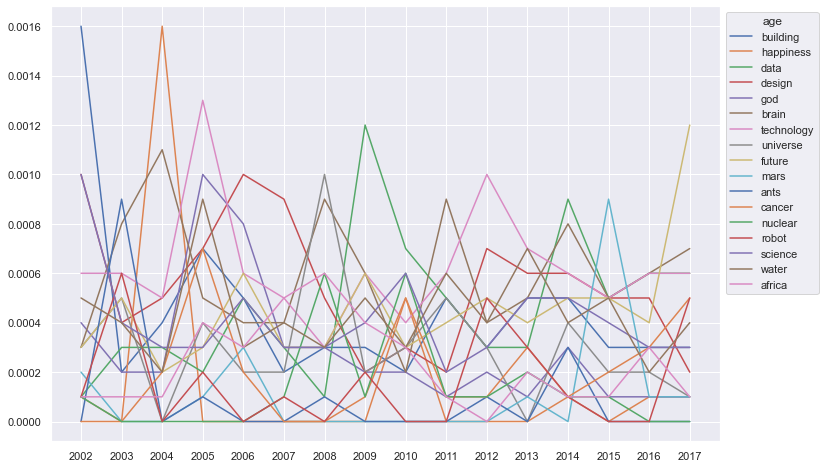

In [13]:
# Create a smaller df to plot and drop the standard deviation column:
to_plot = rounded.loc[reviewed].drop(columns='STD')


for i in range(len(to_plot)):
    plt.plot([k for k in to_plot.columns], [to_plot[y].iloc[i] for y in to_plot.columns])
plt.legend(to_plot.index, title='age', bbox_to_anchor=(1, 1))
plt.show()

### NMF of Normalized Frequencies

Okay, this is new territory (for at least one of us): we are going to take our pandas dataframe which has a neatly labelled index (the terms) and columns (the years) and we are going to dump the values into SciKit-Learn's NMF modeler to see if we can cluster the terms whose trends are similar. According to the **pandas** documentation, one can simply use `df.values`, but it is not clear (to me) how we will maintain our labels. 

How to do this:
* Kaggle's [A Home for Pandas and Sklearn: Beginner How-Tos](https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos).
* Data School's [How do I use pandas with scikit-learn?](https://www.youtube.com/watch?v=ylRlGCtAtiE) focuses on Kaggle's Titanic dataset, but it's still useful.
* [Enter the Matrix: Factorization Uncovers Knowledge from Omics: Trends in Genetics](https://www.cell.com/trends/genetics/fulltext/S0168-9525(18)30124-0)
* [Clustering underlying stock trends via non-negative matrix factorization](http://ceur-ws.org/Vol-1774/MIDAS2016_paper1.pdf)

In [25]:
from sklearn.decomposition import NMF

In [26]:
model = NMF(n_components=5, init='random', random_state=0)

In [27]:
W = model.fit_transform(df)

In [28]:
H = model.components_

## TF-IDF

In [14]:
tfidf = pd.read_csv('../output/yearly-tfidf-min2_max1.0.csv', index_col = 'term')
tfidf.drop(columns = ['Unnamed: 0'], inplace=True)
tfidf.head()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
term,,,,,,,,,,,,,,,,
00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000382,0.000000,0.000201,0.000000,0.000000,0.000262,0.000000,0.000000,0.000000,0.000000,0.00000
000,0.005988,0.006389,0.007877,0.006931,0.006241,0.006315,0.009109,0.005988,0.007634,0.005804,0.005558,0.009499,0.004742,0.005872,0.006819,0.00665
000th,0.000000,0.000000,0.000000,0.000214,0.000000,0.000159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000346,0.000149,0.000000,0.000174,0.00000
01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000223,0.000000,0.000000,0.000212,0.000000,0.000208,0.000000,0.000000,0.000000,0.00000
02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000224,0.000000,0.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.00000


In [15]:
tfidf['STD'] = tfidf.std(axis=1)

In [16]:
tfidf.sort_values(by='STD', ascending=False).head(20).style.background_gradient(cmap='Reds')

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,STD
term,,,,,,,,,,,,,,,,,
you,0.200790,0.190123,0.244566,0.181780,0.216314,0.207447,0.184919,0.175695,0.213491,0.186253,0.185436,0.177518,0.173486,0.168693,0.166139,0.205672,0.020946
we,0.148434,0.123396,0.141523,0.178840,0.166086,0.152954,0.172439,0.185210,0.178655,0.179409,0.163846,0.174380,0.172100,0.189800,0.190518,0.175110,0.018415
it,0.220145,0.226798,0.231008,0.220635,0.210677,0.197546,0.187014,0.186605,0.195590,0.193616,0.204033,0.181420,0.185304,0.176787,0.179096,0.191231,0.017626
the,0.516318,0.545523,0.515603,0.548281,0.492017,0.527232,0.541275,0.539718,0.496302,0.530257,0.519114,0.518815,0.526950,0.529884,0.533196,0.499403,0.017030
to,0.320401,0.285480,0.323075,0.295616,0.327139,0.296865,0.310354,0.310625,0.310452,0.307447,0.338060,0.336293,0.323188,0.333974,0.339609,0.337324,0.016847
is,0.131168,0.166934,0.177808,0.172224,0.167797,0.170807,0.151214,0.188491,0.178304,0.146057,0.148242,0.153346,0.146201,0.143461,0.150028,0.161744,0.015681
and,0.401302,0.368651,0.362459,0.346338,0.384917,0.382463,0.377216,0.364515,0.365031,0.402826,0.386156,0.385825,0.376080,0.370554,0.367910,0.380111,0.014517
that,0.252450,0.254246,0.227521,0.255815,0.239063,0.244165,0.231741,0.230159,0.258242,0.237970,0.234494,0.243335,0.280948,0.248120,0.232373,0.251683,0.013758
my,0.041077,0.025318,0.029054,0.043056,0.042276,0.038200,0.053472,0.031825,0.036942,0.053623,0.053226,0.057929,0.053111,0.050306,0.068024,0.057631,0.011842


In [17]:
# tfidf.to_csv('../output/tfidf_std-2-100.csv')

In [18]:
# Hand inspection revealed these terms in the top ~150 terms when STD was sorted:

terms = ['people', 'glamour', 'world', 'happiness', 'origami', 
         'building', 'glamorous', 'gang', 'data', 'design', 
         'vagina', 'mars', 'technology', 'brain', 'future', 
         'energy', 'universe', 'cells', 'camel', 'robot', 'nsa', 
         'nuclear', 'polio', 'refugees', 'love']
tfidf.loc[terms].style.background_gradient(cmap='Reds')

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,STD
term,,,,,,,,,,,,,,,,,
people,0.039685,0.039988,0.039255,0.028354,0.048517,0.038823,0.031154,0.049460,0.047384,0.037597,0.038049,0.044613,0.039031,0.039198,0.046799,0.045071,0.005924
glamour,0.000000,0.000000,0.019068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.004764
world,0.016152,0.019166,0.016270,0.024468,0.032915,0.023232,0.019767,0.025427,0.025886,0.018539,0.019131,0.018150,0.021595,0.024360,0.028045,0.023979,0.004570
happiness,0.001329,0.000000,0.017667,0.000111,0.000107,0.000248,0.000290,0.000261,0.005491,0.000276,0.000453,0.000540,0.001083,0.000168,0.000723,0.000926,0.004415
origami,0.000000,0.000000,0.000000,0.000000,0.000000,0.000382,0.013597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000179,0.000000,0.000000,0.000000,0.003391
building,0.016152,0.002248,0.003874,0.006931,0.005436,0.001793,0.003097,0.003281,0.002632,0.005198,0.002779,0.005683,0.004961,0.003095,0.003495,0.003090,0.003388
glamorous,0.000000,0.000000,0.013180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000354,0.000000,0.000000,0.000149,0.000324,0.000348,0.000000,0.003278
gang,0.000000,0.000362,0.012847,0.000000,0.000154,0.000358,0.000000,0.000126,0.000134,0.000000,0.000000,0.000130,0.000000,0.000607,0.000130,0.000000,0.003183
data,0.000835,0.002721,0.003486,0.001680,0.005234,0.003430,0.001366,0.012550,0.007459,0.005198,0.003100,0.003732,0.009338,0.005078,0.006308,0.006650,0.003087


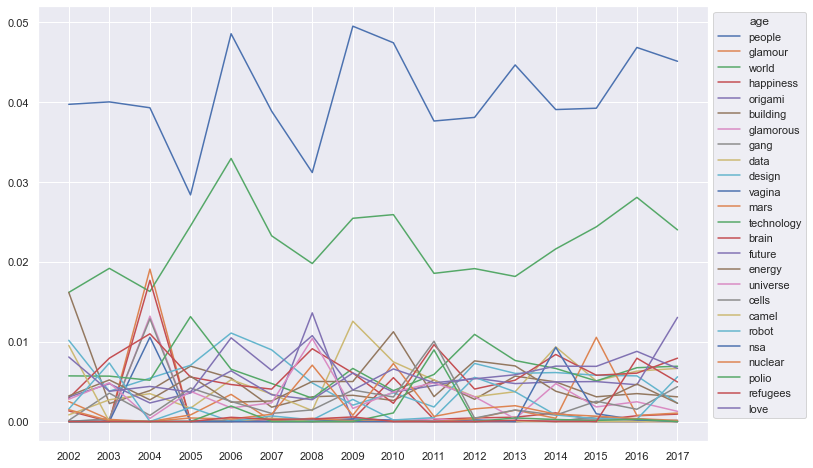

In [19]:
to_plot = tfidf.loc[terms].drop(columns='STD')


for i in range(len(to_plot)):
    plt.plot([k for k in to_plot.columns], [to_plot[y].iloc[i] for y in to_plot.columns])
plt.legend(to_plot.index, title='age', bbox_to_anchor=(1, 1))
plt.show()